# Titanic Decision Tree

### importing necessary libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

### Reading Excel file

In [2]:
df=pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Dimentionality Reduction

In [3]:
df=df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis="columns")
df


,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


### Conversion of categorical variables to numaric

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le_sex=LabelEncoder()

In [6]:
df['Pass_Sex']=le_sex.fit_transform(df.Sex)

In [7]:
df=df.drop(['Sex'],axis=1)

### remove Input contains NaN, infinity or a value too large for dtype('float32').

In [8]:
# to remove Input contains NaN, infinity or a value too large for dtype('float32').
import numpy as np
df= df[np.isfinite(df).all(1)]
df

,Survived,Pclass,Age,Fare,Pass_Sex
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1
...,...,...,...,...,...
885,0,3,39.0,29.1250,0
886,0,2,27.0,13.0000,1
887,1,1,19.0,30.0000,0
889,1,1,26.0,30.0000,1


### Identifying Dependent and Independent

In [9]:
X=df.drop(['Survived'],axis=1)
Y=df.Survived
X,Y

(     Pclass   Age     Fare  Pass_Sex
 0         3  22.0   7.2500         1
 1         1  38.0  71.2833         0
 2         3  26.0   7.9250         0
 3         1  35.0  53.1000         0
 4         3  35.0   8.0500         1
 ..      ...   ...      ...       ...
 885       3  39.0  29.1250         0
 886       2  27.0  13.0000         1
 887       1  19.0  30.0000         0
 889       1  26.0  30.0000         1
 890       3  32.0   7.7500         1
 
 [714 rows x 4 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 885    0
 886    0
 887    1
 889    1
 890    0
 Name: Survived, Length: 714, dtype: int64)

In [10]:
df.dropna(inplace=True)
df['fare']=df['Fare'].round(decimals =2)
df=df.drop(['Fare'],axis=1)
df

,Survived,Pclass,Age,Pass_Sex,fare
0,0,3,22.0,1,7.25
1,1,1,38.0,0,71.28
2,1,3,26.0,0,7.92
3,1,1,35.0,0,53.10
4,0,3,35.0,1,8.05
...,...,...,...,...,...
885,0,3,39.0,0,29.12
886,0,2,27.0,1,13.00
887,1,1,19.0,0,30.00
889,1,1,26.0,1,30.00


### Model Building 
### Spliting dataset for training and testing 

In [11]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=200)
model=DecisionTreeClassifier()
model.fit(X,Y)

DecisionTreeClassifier()

### Calculating Score of model

In [12]:
model.score(x_test,y_test)

0.972027972027972

<AxesSubplot:>

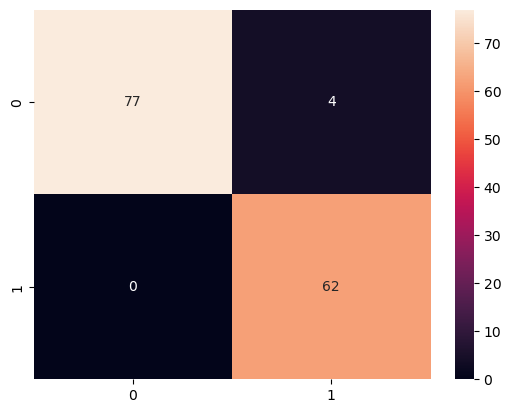

In [13]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(model.predict(x_test),y_test)
import seaborn as sns 
sns.heatmap(cm,annot=True)

### Storing model into pickle file

In [14]:
import pickle
with open("model_titanic.pickle","wb") as f:
    pickle.dump(model,f)
    

In [15]:
with open("model_titanic.pickle","rb") as f:
    model=pickle.load(f)
model.predict(x_test)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)